<a href="https://colab.research.google.com/github/BattalovTN/Battalov_statprak/blob/main/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

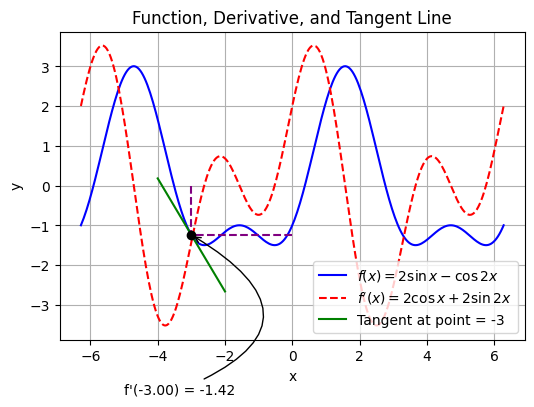

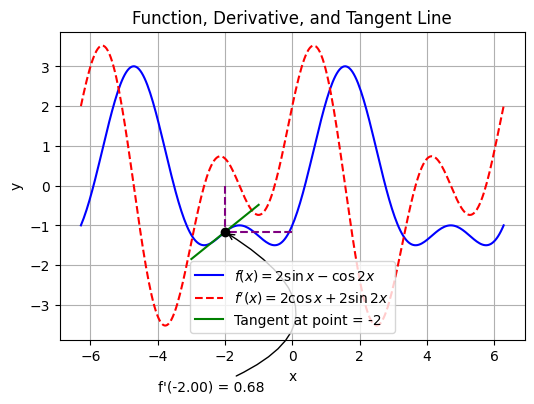

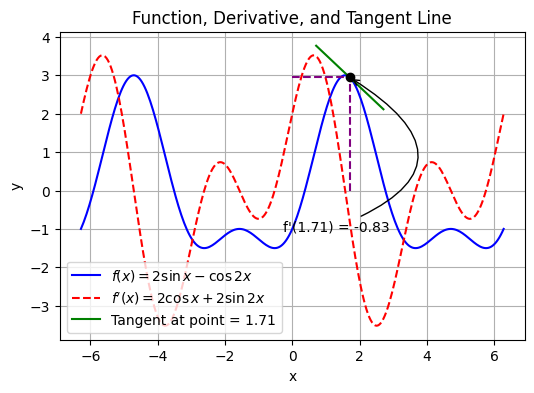

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Функция
def f(x):
    return 2 * np.sin(x) - np.cos(2 * x)

#Производная функции
def d_f(x):
    return 2 * np.cos(x) + 2 * np.sin(2 * x)

def beauty_derivative_plot(point):
    x = np.linspace(-2 * np.pi, 2 * np.pi, 300)

    #Касательная
    tangent_x = np.linspace(point - 1, point + 1, 100)
    tangent_y = f(point) + d_f(point) * (tangent_x - point)

    plt.figure(figsize=(6, 4))

    #График функции, производной касательной, осей к точке, точки соответственно
    plt.plot(x, f(x), label=r'$f(x) = 2\sin x - \cos 2x$', color='blue')
    plt.plot(x, d_f(x), label=r"$f'(x) = 2\cos x + 2\sin 2x$", color='red', linestyle='dashed')
    plt.plot(tangent_x, tangent_y, label=f'Tangent at point = {point}', color='green')
    plt.plot([point, point], [0, f(point)], color='purple', linestyle='dashed')
    plt.plot([0, point], [f(point), f(point)], color='purple', linestyle='dashed')
    plt.scatter(point, f(point), color='black', zorder=3)

    #Стрелка и текст к точке
    plt.annotate(f'f\'({point:.2f}) = {d_f(point):.2f}',
                 xy=(point, f(point)),
                 xytext=(point - 2, f(point) - 4),
                 arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle="arc3,rad=1"),)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Function, Derivative, and Tangent Line')
    plt.legend()
    plt.grid(True)
    plt.show()

#Выводим как в примере
beauty_derivative_plot(-3)
beauty_derivative_plot(-2)
beauty_derivative_plot(1.71)



## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

path = "populations.txt"
array = np.loadtxt(path)

year = array[:, 0]
hare = array[:, 1]
lynx = array[:, 2]
carrot = array[:, 3]

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

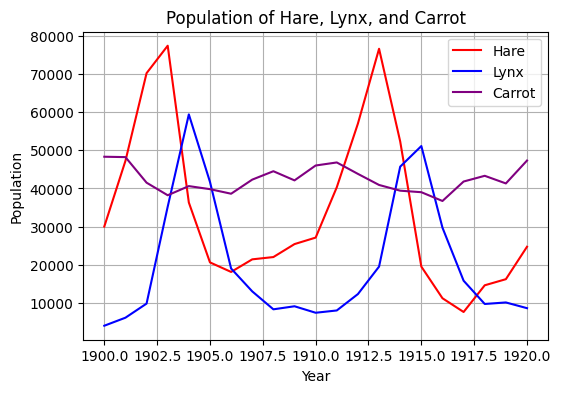

In [3]:
plt.figure(figsize=(6, 4))

#Просто строю график, в дальнейшем нет смысла комментировать подобные куски
plt.plot(year, hare, label="Hare", color='red')
plt.plot(year, lynx, label="Lynx", color='blue')
plt.plot(year, carrot, label="Carrot", color='purple')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population of Hare, Lynx, and Carrot')

plt.legend()
plt.grid(True)
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

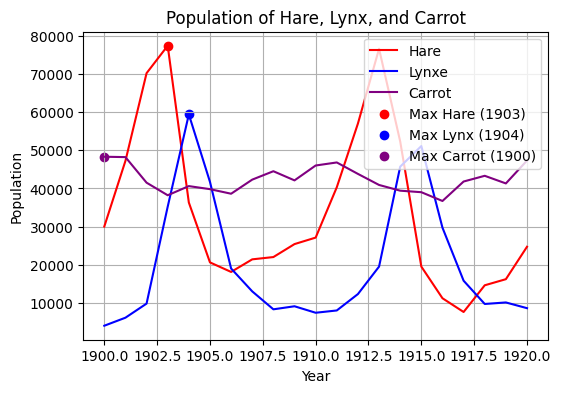

In [4]:
plt.figure(figsize=(6, 4))

#Максимумы
max_year_for_hare = year[np.argmax(hare)]
max_year_for_lynx = year[np.argmax(lynx)]
max_year_for_carrot = year[np.argmax(carrot)]
#Опять графики
plt.plot(year, hare, label="Hare", color='red')
plt.plot(year, lynx, label="Lynxe", color='blue')
plt.plot(year, carrot, label="Carrot", color='purple')
#Вывожу максимумы
plt.scatter(max_year_for_hare, max(hare), color='red', label=f'Max Hare ({int(max_year_for_hare)})')
plt.scatter(max_year_for_lynx, max(lynx), color='blue', label=f'Max Lynx ({int(max_year_for_lynx)})')
plt.scatter(max_year_for_carrot, max(carrot), color='purple', label=f'Max Carrot ({int(max_year_for_carrot)})')

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population of Hare, Lynx, and Carrot")
plt.legend()
plt.grid(True)
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

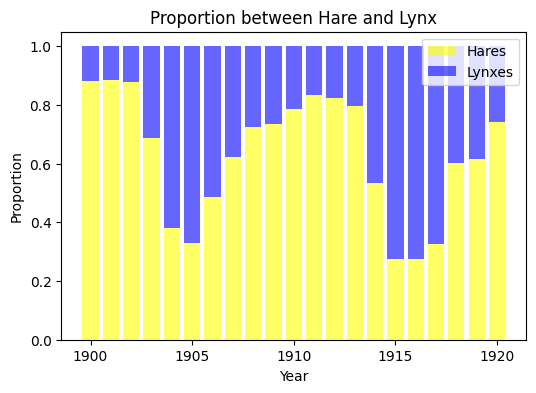

In [5]:
plt.figure(figsize=(6, 4))


#Находим соотношения
total = hare + lynx
ratio_hare = hare / total
ratio_lynx = lynx / total
#Дело техническое
plt.bar(year, ratio_hare, label='Hares', color='yellow', alpha=0.6)
plt.bar(year, ratio_lynx, label='Lynxes', color='blue', alpha=0.6, bottom = ratio_hare) #Вот тут мы зарисовываем при условии, что bottom это hare, иначе будет чушь, а не график

plt.xlabel("Year")
plt.ylabel("Proportion")
plt.title("Proportion between Hare and Lynx")
plt.legend()
plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

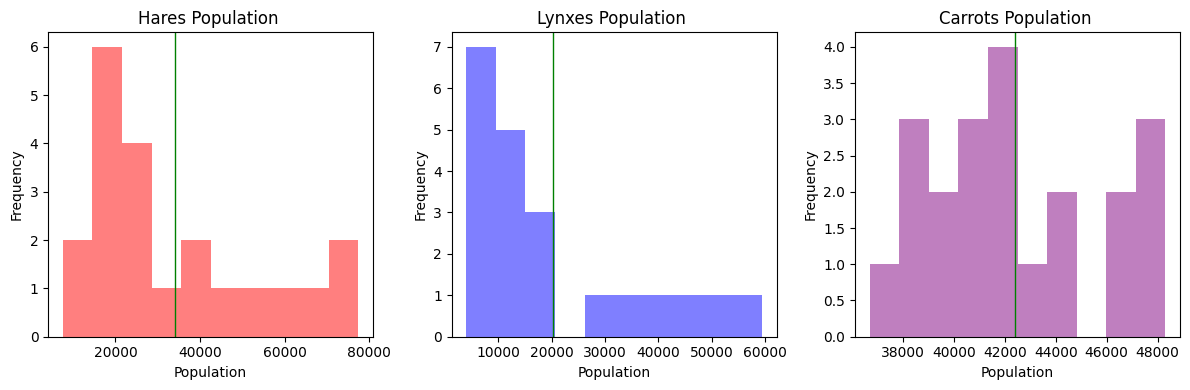

In [6]:
#Вспомогательные массивы
species = {'Hares': hare, 'Lynxes': lynx, 'Carrots': carrot}
colors = {'Hares': 'red', 'Lynxes': 'blue', 'Carrots': 'purple'}

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

#Цикл с 3 итерациями (просто рисуем график трижды)
for ax, (name, population) in zip(axes, species.items()):

  ax.set_xlabel("Population")
  ax.set_ylabel("Frequency")
  ax.set_title(f"{name} Population ")

  mean_val = np.mean(population)
  std_val = np.std(population)

  ax.hist(population, color=colors[name], alpha=0.5, bins=10)
  ax.axvline(mean_val, color='green', linewidth=1)

plt.tight_layout()
plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


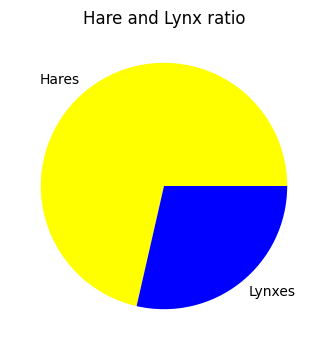

In [7]:
plt.figure(figsize=(6, 4))

large = np.where(hare > lynx, 'H', 'L') #Смотрим большее
count1 = np.sum(large == 'H')
count2 = np.sum(large == 'L')
print(list(large)) #Выводим

plt.pie([count1, count2], labels=['Hares', 'Lynxes'], colors=['yellow', 'blue'])
plt.title("Hare and Lynx ratio")
plt.show()

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

Correlation coefficient: 0.07189206073535571


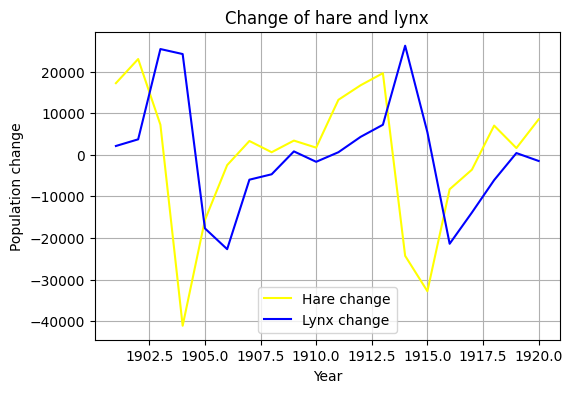

In [8]:
plt.figure(figsize=(6, 4))

hare_change = np.diff(hare)
lynx_change = np.diff(lynx)
print(f'Correlation coefficient: {np.corrcoef(hare, lynx)[0, 1]}') #Коэффицент корреляции

plt.plot(year[1:], hare_change, label='Hare change', color = 'yellow')
plt.plot(year[1:], lynx_change, label='Lynx change', color = 'blue')

plt.xlabel('Year')
plt.ylabel('Population change')
plt.title('Change of hare and lynx')

plt.legend()
plt.grid(True)
plt.show()

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

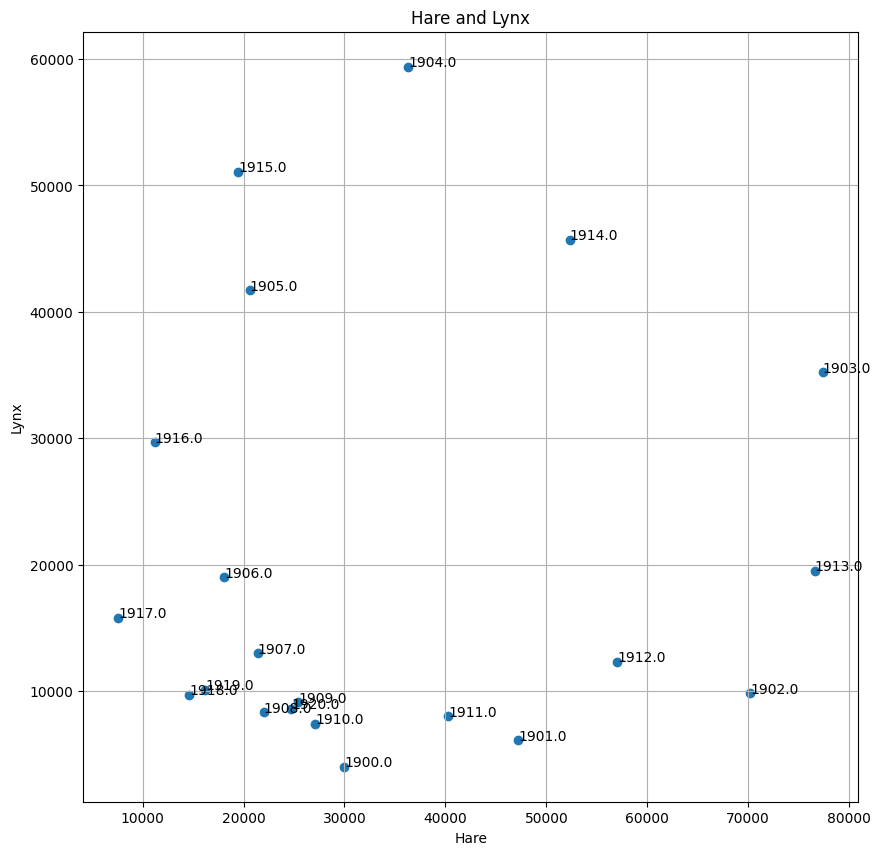

In [11]:
plt.figure(figsize=(10, 10))
plt.scatter(hare, lynx)

plt.xlabel('Hare')
plt.ylabel('Lynx')
plt.title('Hare and Lynx')

c = list(year) #Создаю новый массив, потому что year в plt.annotate перезаписывается, поэтому при повторном запуске всё ломается

for i, c in enumerate(c):
  plt.annotate(str(c), (hare[i], lynx[i])) #Вот тут проблемы возникали, если работать напрямую с year

plt.grid(True)
plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [10]:
estimate = np.mean(hare[:-1]) #Среднее значение элементов в массиве
true = hare[year == 1920][0] #ПРАВДА
error = abs(hare[-1]- estimate)/ true #Ошибка

print(error)

0.39878542510121456
